# Assignment - Exercise 3.2 Graph Comparison
## Week#3
## Date - June-26-2021
## Author - Ganesh Kale

#### Import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#### Load the housing data set

This dataset has house information such as price, year built, number of bedrooms, bathrooms, square foot area etc.

In [2]:
house = pd.read_excel("data/housing_data.xlsx")

In [3]:
# top 5 records of data frame & shape

house = house.loc[(house['Sale Price']>100000)&(house['Sale Price']<4000000)]
house.shape
house.head()

(12754, 24)

,Sale Date,Sale Price,sale_reason,sale_instrument,sale_warning,sitetype,addr_full,zip5,ctyname,postalctyn,...,bedrooms,bath_full_count,bath_half_count,bath_3qtr_count,year_built,year_renovated,current_zoning,sq_ft_lot,prop_type,present_use
0,2006-01-03,698000,1,3,NaN,R1,17021 NE 113TH CT,98052,REDMOND,REDMOND,...,4,2,1,0,2003,0,R4,6635,R,2
1,2006-01-03,649990,1,3,NaN,R1,11927 178TH PL NE,98052,REDMOND,REDMOND,...,4,2,0,1,2006,0,R4,5570,R,2
2,2006-01-03,572500,1,3,NaN,R1,13315 174TH AVE NE,98052,NaN,REDMOND,...,4,1,1,1,1987,0,R6,8444,R,2
3,2006-01-03,420000,1,3,NaN,R1,3303 178TH AVE NE,98052,REDMOND,REDMOND,...,3,1,0,1,1968,0,R4,9600,R,2
4,2006-01-03,369900,1,3,15,R1,16126 NE 108TH CT,98052,REDMOND,REDMOND,...,3,1,0,1,1980,0,R6,7526,R,2


### Scenario:
The dataset is for predicting house price based on the variables such as area of house, number of berooms, bathrooms, year built etc.
The scenario of analysis is to find the relationship between House Sale Price and Bedrooms, there are other variables also to see the relationship with sale price but for this exercise Sale Price and number of bedrooms are chosen and viewed using different charts such as - Scatter Plot, Bar Chart and Violin chart.

A. Display the same analysis (of the same data) using 3 different charts (e.g.,  a bar chart, a line chart and a pie chart)

B. Use appropriate, complete, professional labeling.

C. Rank your charts from most effective to least effective.

D. Write a 300-word paper justifying your ranking. 
=> Attached separately to assignment submission link

### For this analysis Python's Seaborn graphical library is used to visualize different plots

Scatter plot - 

In [6]:
# set x-axis tick labels in currency format

xlables = ['${:1.1f}M'.format(x*1e-6) for x in fig.get_xticks()]

<ipython-input-7-b735243ee559>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlables);


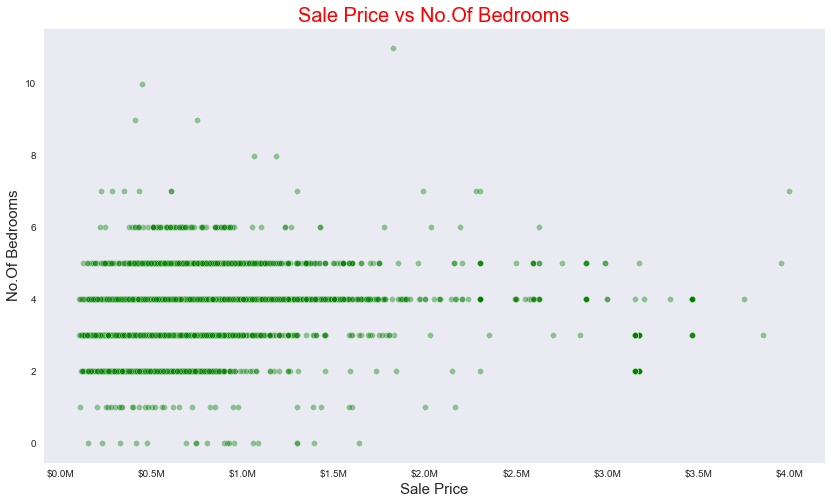

In [7]:
# plot scatterplot and set title, lables and ticks

sns.set_style('dark')
plt.figure(figsize = (14,8))
fig = sns.scatterplot(data=house, x= 'Sale Price', y = 'bedrooms', color = 'green', alpha = 0.4)
plt.xlabel('Sale Price',fontsize=15)
plt.ylabel('No.Of Bedrooms',fontsize=15)
plt.title("Sale Price vs No.Of Bedrooms",fontsize=20, color = 'red')
fig.set_xticklabels(xlables);

Bar chart - 

In [8]:
# created bins of Sale Price and sorted to plot bar chart

labels = ['Less than 385K','385K-462K','462K-532K','532K-595K','595K-665K','665K-750K','750K-878K','878K-4M']
x = pd.qcut(house['Sale Price'], q = 8,labels=labels)
x = x.sort_values()

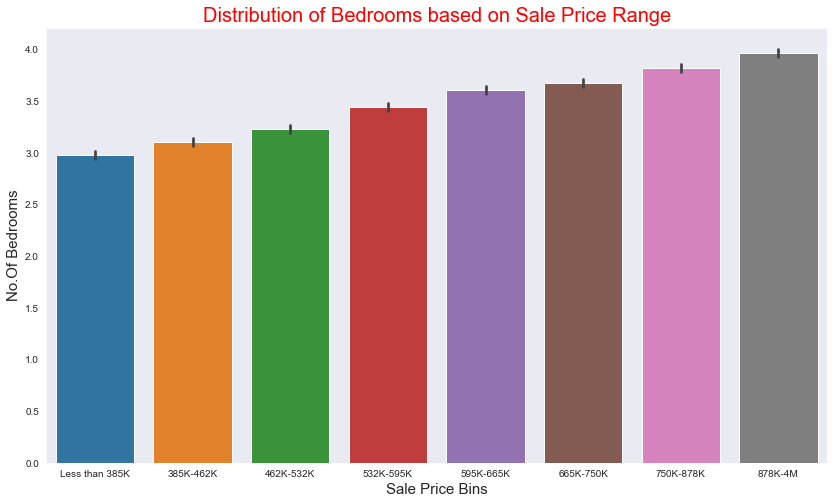

In [9]:
# bar chart plotted by binning Sale price into 8 quantiles vs number of bedrooms

plt.figure(figsize=(14,8))
sns.barplot(data=house, x=x, y= 'bedrooms')
plt.xlabel('Sale Price Bins',fontsize=15)
plt.ylabel('No.Of Bedrooms',fontsize=15)
plt.title("Distribution of Bedrooms based on Sale Price Range",fontsize=20, color = 'red');

Violin Plot - 

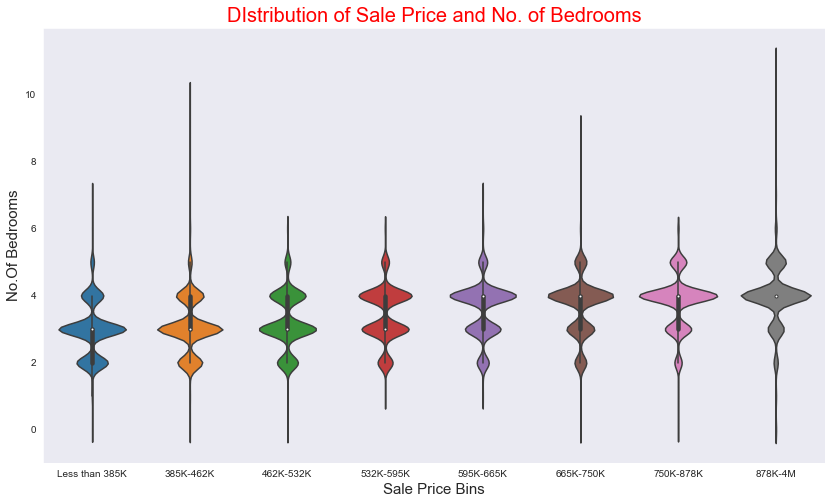

In [10]:
# plotted violin plot to see the distribution house price and number of bedrooms


plt.figure(figsize=(14,8))
sns.violinplot(data=house, x=x, y= 'bedrooms')
plt.xlabel('Sale Price Bins',fontsize=15)
plt.ylabel('No.Of Bedrooms',fontsize=15)
plt.title("DIstribution of Sale Price and No. of Bedrooms",fontsize=20, color = 'red');

# Using Matplotlib:
Same charts plotted using matplotlib pyplot

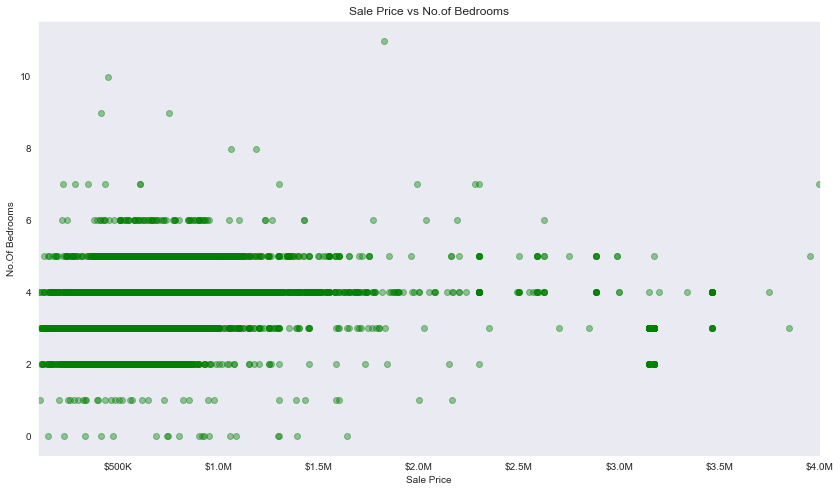

In [11]:
# function to write x-axis limits in currency format

def axis_currency(x,pos):
    if x >= 1e6:
        cur = '${:1.1f}M'.format(x*1e-6)
    else:
        cur = '${:1.0f}K'.format(x*1e-3)
    return cur

# plot scatter plot and set x-axis limits and format the ticks.

fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(house['Sale Price'], house['bedrooms'], color = 'green', alpha = 0.4)
ax.set(xlabel='Sale Price', ylabel = 'No.Of Bedrooms', xlim=[100000,4000000], title = 'Sale Price vs No.of Bedrooms')
ax.xaxis.set_major_formatter(axis_currency);

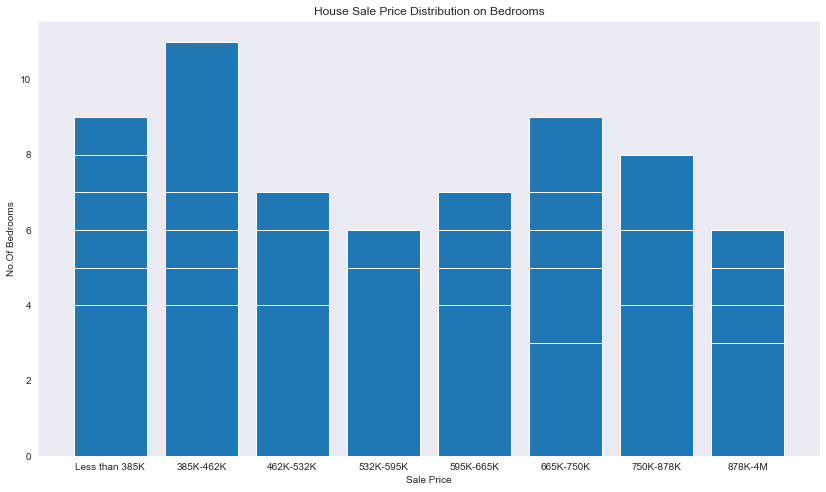

In [12]:
# created bins of Sale Price and sorted to plot bar chart

labels = ['Less than 385K','385K-462K','462K-532K','532K-595K','595K-665K','665K-750K','750K-878K','878K-4M']
x = pd.qcut(house['Sale Price'], q = 8,labels=labels)
x = x.sort_values()

# barplot to see the distribution house prices on number of bedrooms

fig, ax = plt.subplots(figsize=(14,8))
plt.bar(x=x,height = house['bedrooms'], data=house)#color=list('rgbkymc')
ax.set(xlabel='Sale Price', ylabel = 'No.Of Bedrooms', title = 'House Sale Price Distribution on Bedrooms');

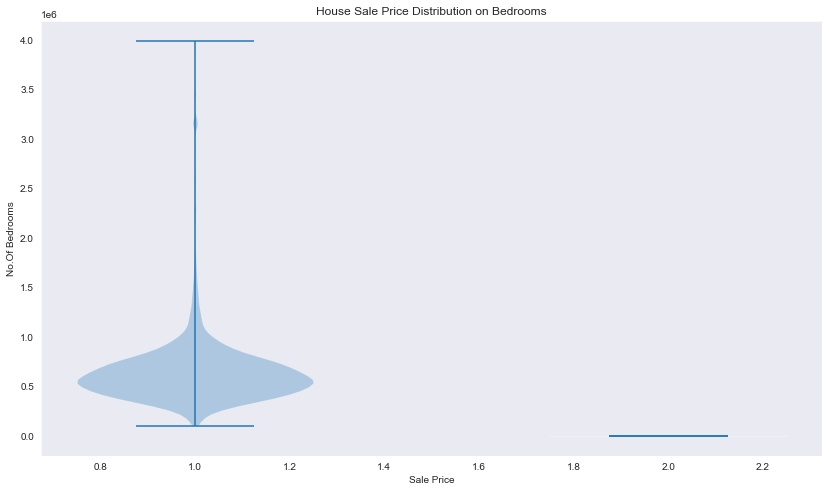

In [13]:
# Violin plot to see the sale price distribution based on number of bedrooms 

data = [house['Sale Price'].values,house['bedrooms'].values]


fig, ax = plt.subplots(figsize=(14,8))
plt.violinplot(dataset=data)
ax.set(xlabel='Sale Price', ylabel = 'No.Of Bedrooms', title = 'House Sale Price Distribution on Bedrooms');

# END